In [2]:
from __future__ import print_function
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display,clear_output
import numpy as np
import math
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8

import datetime
import pandas as pd
import scipy as sc
from scipy import stats

# INGEST THE data FILE AND ANALYSE THE OUTPUT

In [3]:
# Open the file split by line and make a list
data = open('10.txt').read().splitlines()

# Split each datapoint up within a minute
for i in range(0,len(data)): data[i] = data[i].split(',')

print (int(data[3928][0]))

2013


In [4]:
# Turn data into np.array format
mash = np.zeros([len(data),56])
for i in range (0,(len(data))):
    for j in range (0,56):
        mash[i,j]=int(data[i][j])
        
print (len(mash))

16595


In [5]:
# create allot array
allot = np.zeros([46*len(mash),2])

In [6]:
# Copy all radar variables
k=-1
for i in range (0,(len(mash))):
    for j in range (11,56):
        k+=1
        allot[k,1] = mash[i,j]

In [7]:
# Sanity check...
print (sum(allot[:,1]))
print (sum(sum(mash[:,11:56])))

5972841.0
5972841.0


In [8]:
# write synop report numbers to allot
k=-1
for i in range (0,len(mash)):
    for repeat in range (0,45):
        k+=1
        allot[k,0] = mash[i,9]

In [9]:
# Sanity check #2...
print (sum(allot[:,0])/45)
print (sum(mash[:,9]))

7784.0
7784.0


In [10]:
# Make the results table
result = np.zeros([7,7])
offline=0
ambiguous=0
for i in range (0,len(allot)):
            if allot[i,1]==255.:
                offline+=1
            elif allot[i,0]==99.:
                ambiguous+=1
            else:
                result[allot[i,0],allot[i,1]]+=1

/Users/eebp/anaconda/envs/Python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [14]:
print (result)
print (offline)
print (ambiguous)

[[  5.72831000e+05   6.24150000e+04   3.96000000e+02   4.68000000e+02
    5.22000000e+02   0.00000000e+00   0.00000000e+00]
 [  5.06880000e+04   4.95990000e+04   9.00000000e+00   1.80000000e+01
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.42000000e+02   6.93000000e+02   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]]
22959
2430


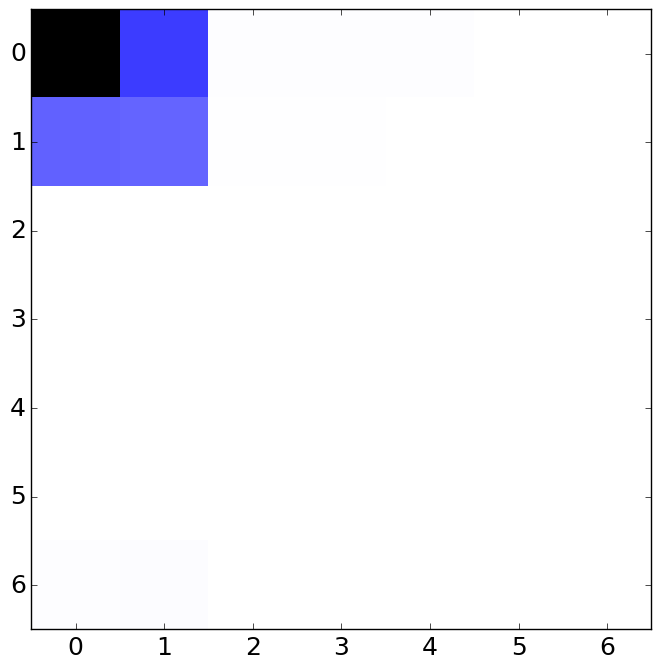

In [13]:
from matplotlib.colors import LinearSegmentedColormap


clevs = [-1,0.9,1.9,2.9,3.9,4.9,5.9,6.9,9]

colors = [(1, 1, 1), (0, 0, 1), (0, 1, 0), (1, 1, 0), (0, 1, 1), (1, 0, 1), (1, 0, 0), (0, 0, 0)]  # R -> G -> B -> Y -> Cy -> Ma -> Wh
n_bins = 572831  # Discretizes the interpolation into bins
cmap_name = 'Precip_Type'
# Create the colormap
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

plt.imshow(result[0:,0:], interpolation='nearest', origin='upper', cmap=cm)